# 项目背景及介绍
## 任务描述：
    随着电信行业的不断发展，运营商们越来越重视如何扩大其客户群体。据研究，获取新客户所需的成本远高于保留现有客户的成本，因此为了满足在激烈竞争中的优势，保留现有客户成为一大挑战。对电信行业而言，可以通过数据挖掘等方式来分析可能影响客户决策的各种因素，以预测他们是否会产生流失（停用服务、转投其他运营商等）。

## 数据集：
    数据集一共提供了7043条用户样本，每条样本包含21列属性，由多个维度的客户信息以及用户是否最终流失的标签组成，客户信息具体如下：
    基本信息：包括性别、年龄、经济情况、入网时间等；
    开通业务信息：包括是否开通电话业务、互联网业务、网络电视业务、技术支持业务等；
    签署的合约信息：包括合同年限、付款方式、每月费用、总费用等。

## 评测：
    电信用户流失预测中，运营商最为关心的是客户的召回率，即在真正流失的样本中，我们预测到多少条样本。其策略是宁可把未流失的客户预测为流失客户而进行多余的留客行为，也不漏掉任何一名真正流失的客户。

## 思路
    数据预处理、可视化分析、特征工程、模型预测、模型评估、分析与决策。
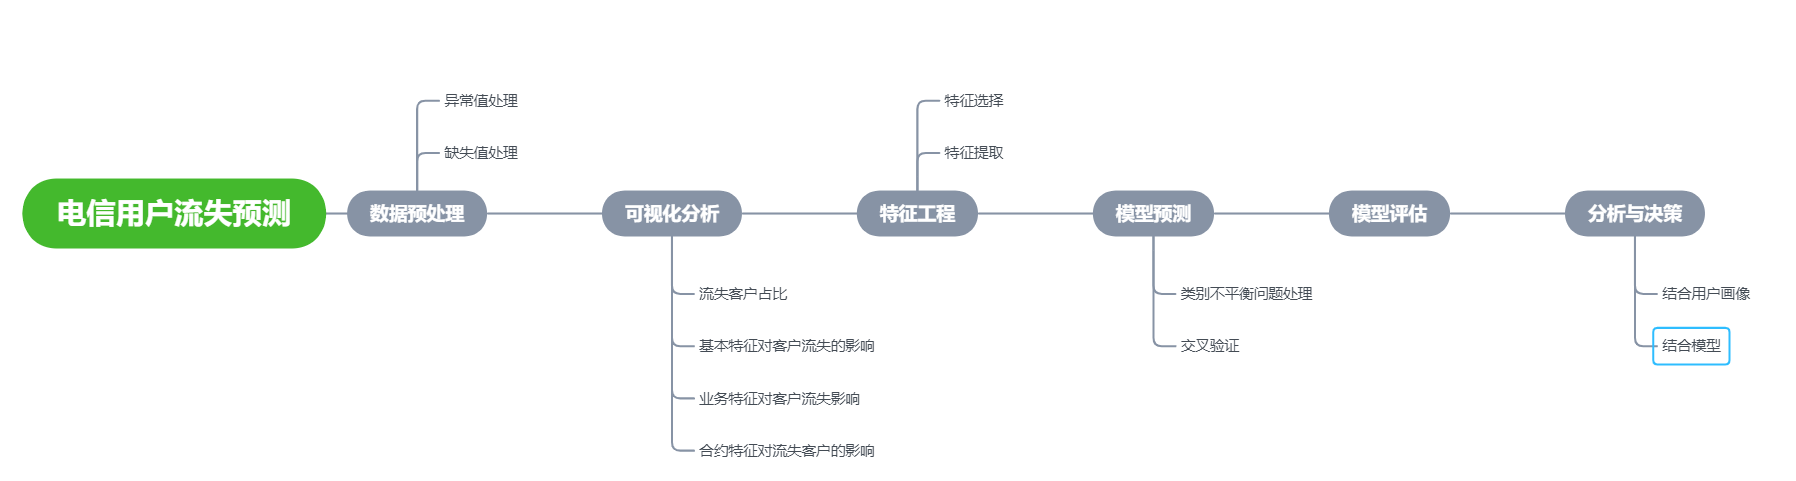

## 数据解读

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [2]:
# 设置忽略警告
import warnings
warnings.filterwarnings('ignore')

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

### 设置不使用科学计数法  #为了直观的显示数字，不采用科学计数法
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# 加载数据
data = pd.read_csv('./datas/Telco-Customer-Churn.csv')

In [4]:
# 查看头10行
data.head(10)
# data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# 查看字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 数据字段介绍
21列原始属性中，除了最后一列Churn表示该数据集的目标变量（即标签列）外，其余20列按照原始数据集中的排列顺序刚好可以分为三类特征群：即客户的基本信息、开通业务信息、签署的合约信息。每一列具体信息如下：

<table>
<thead>
<tr>
<th>$字段名$</th>
<th>$字段描述$</th>
<th>$数据类型$</th>
<th>$字段取值$</th>
<th>$所属特征群或标签$</th>
</tr>
</thead>
<tbody><tr>
<td>customerID</td>
<td>客户ID</td>
<td>字符串</td>
<td>7043个不重复取值</td>
<td>基本信息</td>
</tr>
<tr>
<td>gender</td>
<td>性别</td>
<td>字符串</td>
<td>Male, Female</td>
<td>基本信息</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>是否为老年人</td>
<td>整型</td>
<td>1, 0</td>
<td>基本信息</td>
</tr>
<tr>
<td>Partner</td>
<td>是否有配偶</td>
<td>字符串</td>
<td>Yes, No</td>
<td>基本信息</td>
</tr>
<tr>
<td>Dependents</td>
<td>是否有家属</td>
<td>字符串</td>
<td>Yes, No</td>
<td>基本信息</td>
</tr>
<tr>
<td>tenure</td>
<td>入网月数</td>
<td>整型</td>
<td>0～72</td>
<td>基本信息</td>
</tr>
<tr>
<td>PhoneService</td>
<td>是否开通电话业务</td>
<td>字符串</td>
<td>Yes, No</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>是否开通多线业务</td>
<td>字符串</td>
<td>Yes, No, No phone service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>InternetService</td>
<td>是否开通互联网业务</td>
<td>字符串</td>
<td>DSL数字网络, Fiber optic光纤网络, No</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>是否开通在线安全业务</td>
<td>字符串</td>
<td>Yes, No, No internet service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>是否开通在线备份业务</td>
<td>字符串</td>
<td>Yes, No, No internet service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>是否开通设备保护业务</td>
<td>字符串</td>
<td>Yes, No, No internet service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>TechSupport</td>
<td>是否开通技术支持业务</td>
<td>字符串</td>
<td>Yes, No, No internet service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>StreamingTV</td>
<td>是否开通网络电视业务</td>
<td>字符串</td>
<td>Yes, No, No internet service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>StreamingMovies</td>
<td>是否开通网络电影业务</td>
<td>字符串</td>
<td>Yes, No, No internet service</td>
<td>开通业务信息</td>
</tr>
<tr>
<td>Contract</td>
<td>合约期限</td>
<td>字符串</td>
<td>Month-to-month, One year, Two year</td>
<td>签署的合约信息</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>是否采用电子结算</td>
<td>字符串</td>
<td>Yes, No</td>
<td>签署的合约信息</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>付款方式</td>
<td>字符串</td>
<td>Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check</td>
<td>签署的合约信息</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>每月费用</td>
<td>浮点型</td>
<td>18.25～118.75</td>
<td>签署的合约信息</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>总费用</td>
<td>字符串</td>
<td>有部分空格字符，除此之外的字符串对应的浮点数取值范围在18.80～8684.80之间</td>
<td>签署的合约信息</td>
</tr>
<tr>
<td>Churn</td>
<td>客户是否流失</td>
<td>字符串</td>
<td>Yes, No</td>
<td>目标变量</td>
</tr>
</tbody></table>

## 数据预处理

In [6]:
# 查看数据集中缺失值情况
data.isnull().any()
#isna

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

- 虽然统计结果没有None值，但是字段描述中有提到：
- - TotalCharges【总费用】有部分空格字符，除此之外的字符串对应的浮点数取值范围在18.80～8684.80之间	

In [7]:
# 查看TotalCharges的缺失值
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- 对TotalCharges这列原本为字符串类型的特征，由于其特征值含有数值意义，应该首先将其特征值转换为数值形式（浮点数）。此外，对其中不可转换的空格字符，可以用convert_objects()函数转换成标准的数值型缺失值NaN。

In [8]:
#  convert_numeric如果为True，则尝试强制转换为数字，不可转换的变为NaN
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce') 

print("此时TotalCharges是否已经转换为浮点型：", data['TotalCharges'].dtype == 'float')
print("此时TotalCharges存在%s行缺失样本。" % data['TotalCharges'].isnull().sum())

此时TotalCharges是否已经转换为浮点型： True
此时TotalCharges存在11行缺失样本。


## 缺失值填充
- - 一般缺失值填充方式为均值填充、众数填充、中值填充、0、或者特殊值填充

In [9]:
# 方式一：填充为0/均值等 pandas fillna 或者scikit-learn imputer
# 固定值填充
fnDf = data['TotalCharges'].fillna(0).to_frame()
print("如果采用固定值填充方法还存在%s行缺失样本。" % fnDf['TotalCharges'].isnull().sum())

如果采用固定值填充方法还存在0行缺失样本。


In [10]:
# 方式二：在这里我们根据实际业务场景的字段描述可以发现，MonthlyCharges【每月费用】 和TotalCharges【总费用】之间应该存在一定的关系，
# 同时我们发现缺省值对应的数据tenure【入网月数】全部是0，且在整个数据集中tenure为0与TotalCharges为缺失值是一一对应的。
# 结合实际业务分析，这些样本对应的客户可能入网当月就流失了，但仍然要收取当月的费用，因此总费用即为该用户的每月费用（MonthlyCharges）。
# 因此本案例我们最终采用MonthlyCharges的数值对TotalCharges进行填充。
# 用MonthlyCharges的数值填充TotalCharges的缺失值
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])    

data[data['tenure'] == 0][['MonthlyCharges', 'TotalCharges']]    # 观察处理后缺失值变化情况

,MonthlyCharges,TotalCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20.00
5218,19.70,19.70
6670,73.35,73.35


## 异常值处理

In [11]:
# 查看数值类特征的统计信息
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.80
std,0.37,24.56,30.09,2266.73
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


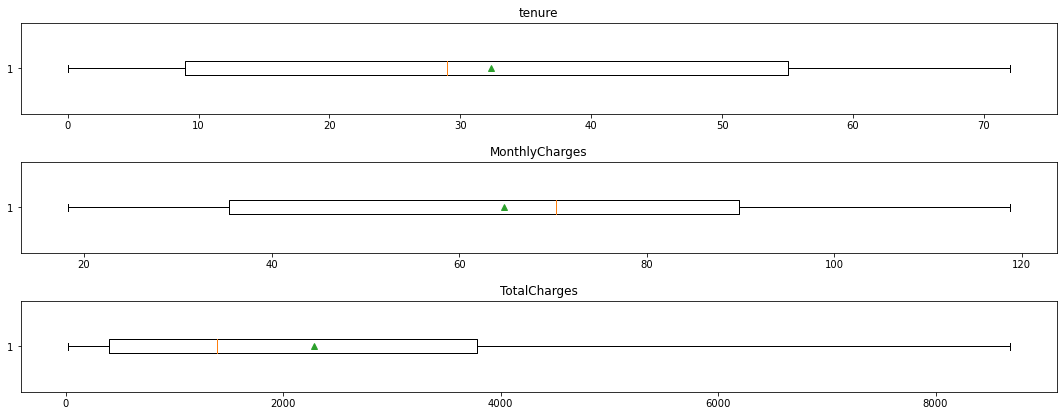

In [12]:
# SeniorCitizen【是否为老年人】取值只有0和1，是离散特征
# 因此只有tenure、MonthlyCharges及经过处理的TotalCharges是数值特征，继续结合箱型图进行分析：
# 箱型图观察异常值情况
import seaborn as sns  # 备注：安装seaborn常见的一些报错参考：https://blog.csdn.net/m0_61260697/article/details/124280455
import matplotlib.pyplot as plt    # 可视化
# 在Jupyter notebook里嵌入图片
%matplotlib inline

# 分析百分比特征
fig = plt.figure(figsize=(15,6)) # 建立图像

# tenure特征
ax1 = fig.add_subplot(311)    # 子图1
list1 = list(data['tenure'])
ax1.boxplot(list1, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax1.set_title('tenure')

# MonthlyCharges特征
ax2 = fig.add_subplot(312)    # 子图2
list2 = list(data['MonthlyCharges'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('MonthlyCharges')

# TotalCharges
ax3 = fig.add_subplot(313)    # 子图3
list3 = list(data['TotalCharges'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('TotalCharges')

plt.tight_layout(pad=1.5)    # 设置子图之间的间距
plt.show() # 展示箱型图

##  箱型图介绍
- 一、概念介绍
    箱型图（box-plot)，又称为箱线图，盒型图，盒须图。在数据探索阶段或者描述性分析过程中，我们常常用于展示多类连续型数据的数值分布情况，便于类间对比和快速识别异常值。
    在一幅箱型图中，一个连续数值序列构成一个盒子，如下所示。
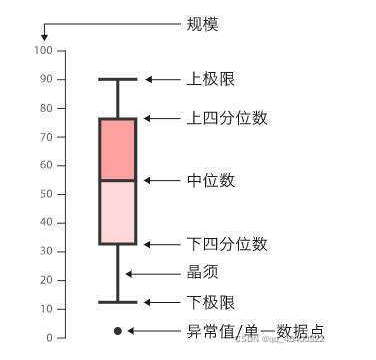
    每一个盒子主要展示的是数据的上四分位数Q1(25%)，中位数（50%)，下四分位数Q3（75%)。划分异常值的界限我们称为上下极限，其离Q1,Q3分别是1.5IQR（IQR=Q3-Q1，称作四分位距）的距离，在上下极限之外的点，我们称为异常点。异常值在不同场景中受到不同的重视.

- 参考链接：
- - https://blog.csdn.net/qq_45400322/article/details/122511125
- - https://blog.csdn.net/qq_25443541/article/details/124137138

由上图的箱型图可以看出来tenure、MonthlyCharges及经过处理的TotalCharges特征均不含离群点【即异常值】。

## 可视化分析

- 1、流失客户占比

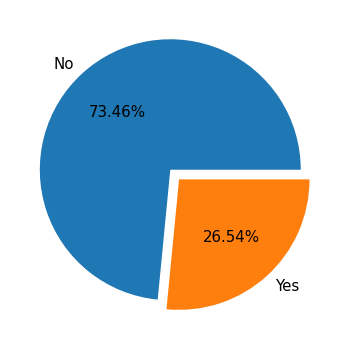

In [13]:
# 观察是否存在类别不平衡现象
p = data['Churn'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)
    
plt.show()    # 展示图像

- 2、基本特征对客户流失影响

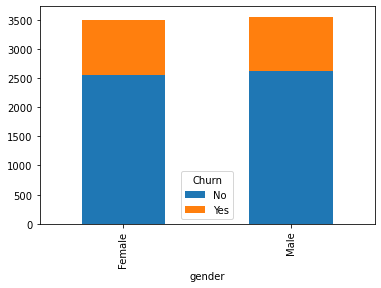

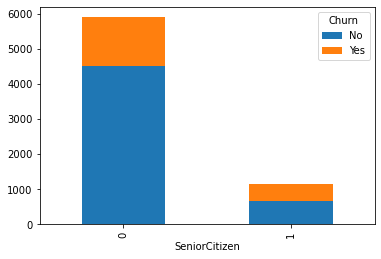

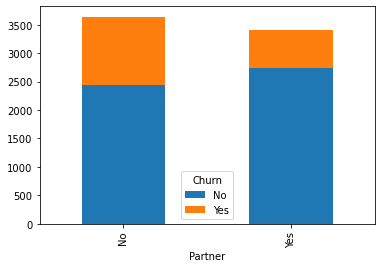

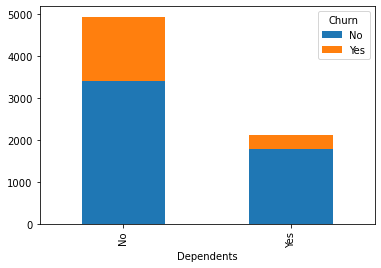

In [14]:
### 性别、是否老年人、是否有配偶、是否有家属等特征对客户流失的影响
baseCols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i in baseCols:
    cnt = pd.crosstab(data[i], data['Churn'])    # 构建特征与目标变量的列联表
    cnt.plot.bar(stacked=True)    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
    plt.show()    # 展示图像

由图可知：
- - 性别对客户流失基本没有影响；
- - 年龄对客户流失有影响，老年人流失占比高于年轻人；
- - 是否有配偶对客户流失有影响，无配偶客户流失占比高于有配偶客户；
- - 是否有家属对客户流失有影响，无家属客户流失占比高于有家属客户.

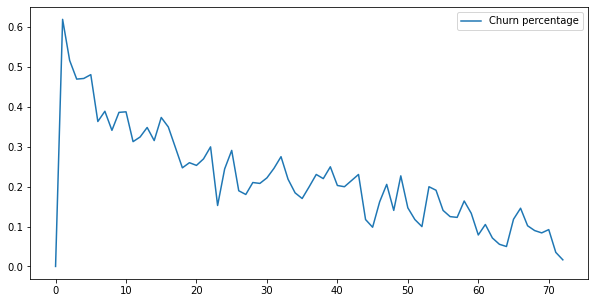

In [15]:
### 观察流失率与入网月数的关系
# 折线图
groupDf = data[['tenure', 'Churn']]    # 只需要用到两列数据
groupDf['Churn'] = groupDf['Churn'].map({'Yes': 1, 'No': 0})    # 将正负样本目标变量改为1和0方便计算
pctDf = groupDf.groupby(['tenure']).sum() / groupDf.groupby(['tenure']).count()    # 计算不同入网月数对应的流失率
pctDf = pctDf.reset_index()    # 将索引变成列

plt.figure(figsize=(10, 5))
plt.plot(pctDf['tenure'], pctDf['Churn'], label='Churn percentage')    # 绘制折线图
plt.legend()    # 显示图例
plt.show()

In [16]:
pctDf.head()

,tenure,Churn
0,0,0.00
1,1,0.62
2,2,0.52
3,3,0.47
4,4,0.47


由图可知：除了刚入网（tenure=0）的客户之外，流失率随着入网时间的延长呈下降趋势；当入网超过两个月时，流失率小于留存率，这段时间可以看做客户的适应期。

- 3、业务特征对客户流失影响

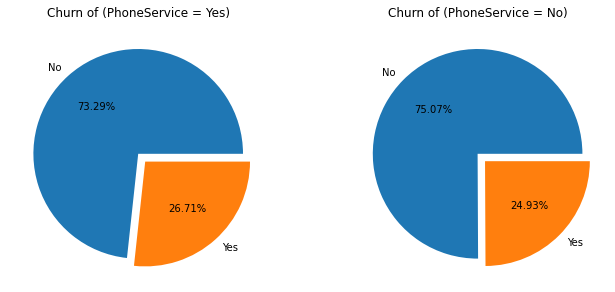

In [17]:
# 电话业务
posDf = data[data['PhoneService'] == 'Yes']
negDf = data[data['PhoneService'] == 'No']

fig = plt.figure(figsize=(10,4)) # 建立图像

ax1 = fig.add_subplot(121)
p1 = posDf['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PhoneService = Yes)')

ax2 = fig.add_subplot(122)
p2 = negDf['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PhoneService = No)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知，是否开通电话业务对客户流失影响很小。

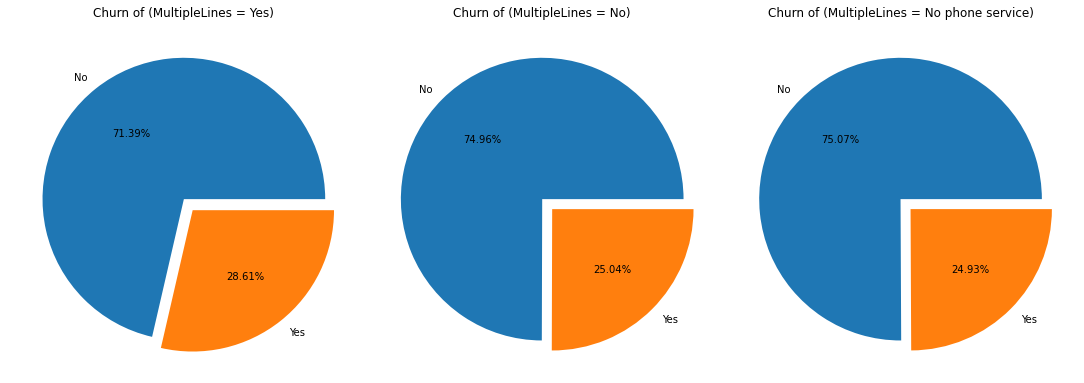

In [18]:
# 多线业务
df1 = data[data['MultipleLines'] == 'Yes']
df2 = data[data['MultipleLines'] == 'No']
df3 = data[data['MultipleLines'] == 'No phone service']

fig = plt.figure(figsize=(15,6)) # 建立图像

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (MultipleLines = Yes)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (MultipleLines = No)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (MultipleLines = No phone service)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图   

由图可知，是否开通多线业务对客户流失影响很小。此外 MultipleLines 取值为 'No'和 'No phone service' 的两种情况基本一致，后续可以合并在一起。

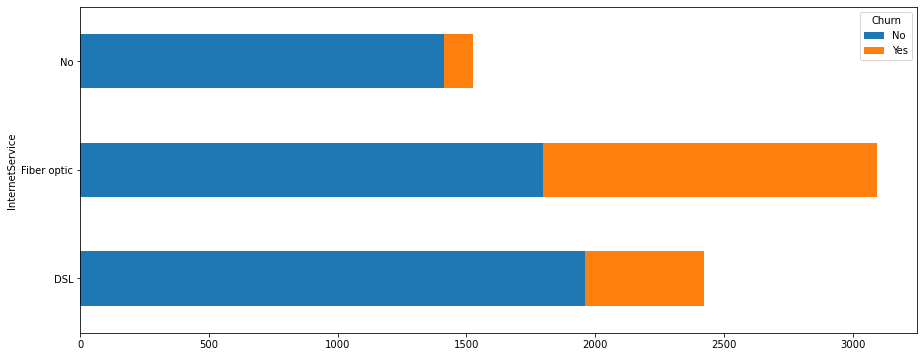

In [19]:
# 互联网业务
cnt = pd.crosstab(data['InternetService'], data['Churn'])    # 构建特征与目标变量的列联表
cnt.plot.barh(stacked=True, figsize=(15,6))    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
plt.show()    # 展示图像

由图可知，未开通互联网的客户总数最少，而流失比例最低（7.40%）；开通光纤网络的客户总数最多，流失比例也最高（41.89%）；开通数字网络的客户则均居中（18.96%）。可以推测应该有更深层次的因素导致光纤用户流失更多客户，下一步观察与互联网相关的各项业务。

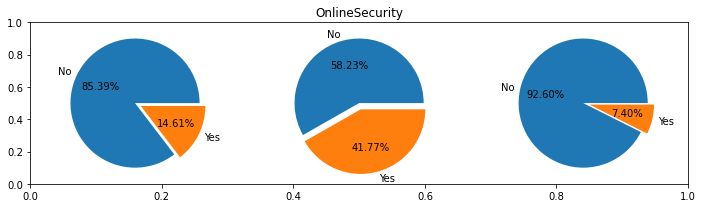

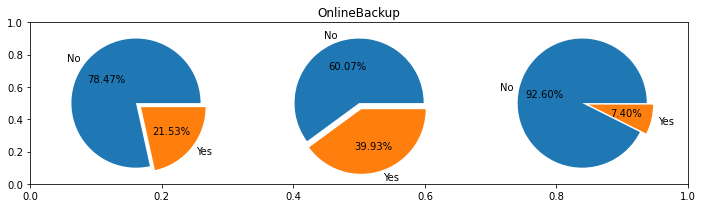

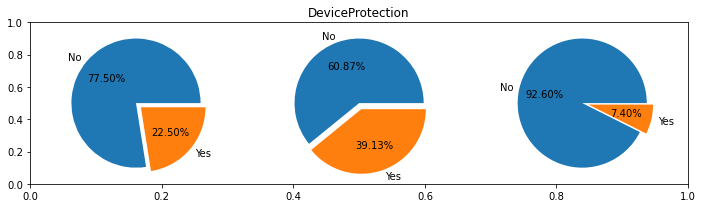

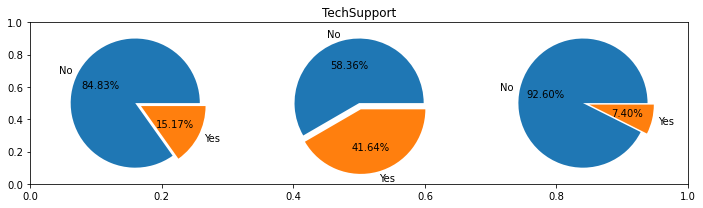

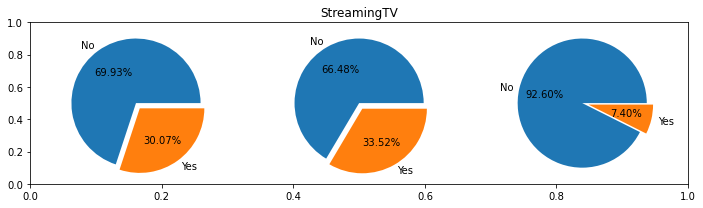

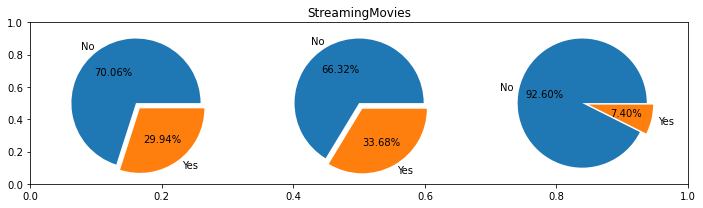

In [20]:
# 与互联网相关的业务
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in internetCols:
    df1 = data[data[i] == 'Yes']
    df2 = data[data[i] == 'No']
    df3 = data[data[i] == 'No internet service']

    fig = plt.figure(figsize=(10,3)) # 建立图像
    plt.title(i)
    
    ax1 = fig.add_subplot(131)
    p1 = df1['Churn'].value_counts()
    ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 开通业务

    ax2 = fig.add_subplot(132)
    p2 = df2['Churn'].value_counts()
    ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 未开通业务

    ax3 = fig.add_subplot(133)
    p3 = df3['Churn'].value_counts()
    ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 未开通互联网业务
  
    plt.tight_layout()    # 设置子图之间的间距
    plt.show() # 展示饼状图

由图可知：所有互联网相关业务中未开通互联网的客户流失率均为7.40%，可以判断原因是上述六列特征均只在客户开通互联网业务之后才有实际意义，因而不会影响未开通互联网的客户；开通了这些新业务之后，用户的流失率会有不同程度的降低，可以认为多绑定业务有助于用户的留存；'StreamingTV'和 'StreamingMovies'两列特征对客户流失基本没有影响。此外，由于 'No internet service' 也算是 'No' 的一种情况，因此后续步骤中可以考虑将两种特征值进行合并。

- 4、合约特征对客户流失影响

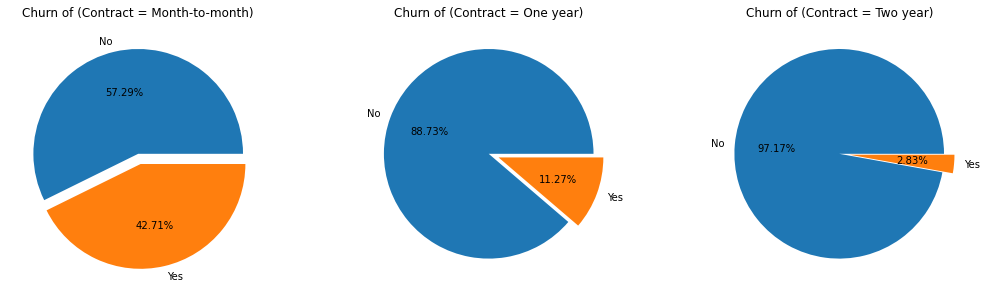

In [21]:
# 合约期限
df1 = data[data['Contract'] == 'Month-to-month']
df2 = data[data['Contract'] == 'One year']
df3 = data[data['Contract'] == 'Two year']

fig = plt.figure(figsize=(15,4)) # 建立图像

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (Contract = Month-to-month)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (Contract = One year)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (Contract = Two year)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知：合约期限越长，用户的流失率越低。

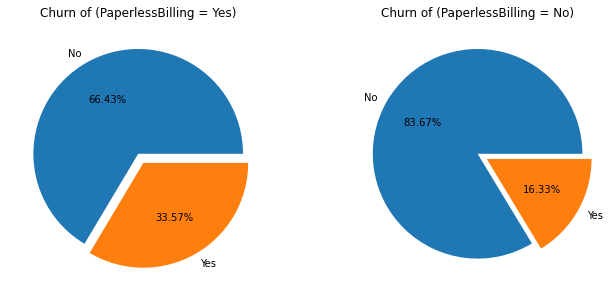

In [22]:
# 是否采用电子结算
df1 = data[data['PaperlessBilling'] == 'Yes']
df2 = data[data['PaperlessBilling'] == 'No']

fig = plt.figure(figsize=(10,4)) # 建立图像

ax1 = fig.add_subplot(121)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PaperlessBilling = Yes)')

ax2 = fig.add_subplot(122)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PaperlessBilling = No)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知：采用电子结算的客户流失率较高，原因可能是电子结算多为按月支付的形式。

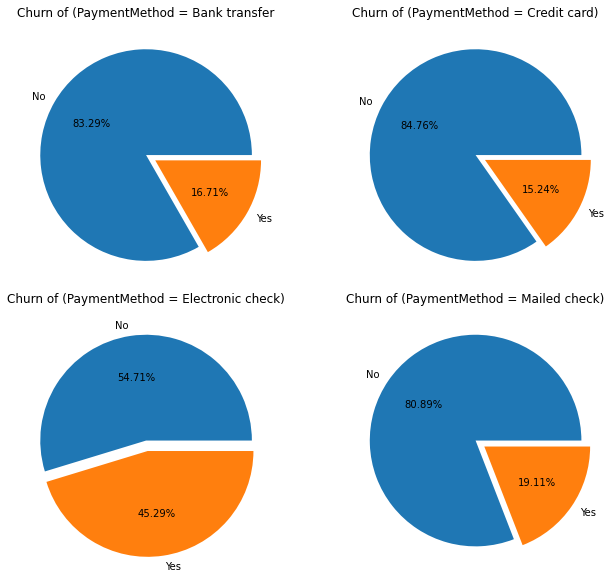

In [23]:
# 付款方式
df1 = data[data['PaymentMethod'] == 'Bank transfer (automatic)']    # 银行转账（自动）
df2 = data[data['PaymentMethod'] == 'Credit card (automatic)']    # 信用卡（自动）
df3 = data[data['PaymentMethod'] == 'Electronic check']    # 电子支票
df4 = data[data['PaymentMethod'] == 'Mailed check']    # 邮寄支票

fig = plt.figure(figsize=(10,8)) # 建立图像

ax1 = fig.add_subplot(221)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PaymentMethod = Bank transfer')

ax2 = fig.add_subplot(222)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PaymentMethod = Credit card)')

ax3 = fig.add_subplot(223)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (PaymentMethod = Electronic check)')

ax4 = fig.add_subplot(224)
p4 = df4['Churn'].value_counts()
ax4.pie(p4,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax4.set_title('Churn of (PaymentMethod = Mailed check)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知：四种付款方式中采用电子支票的客户流失率远高于其他三种。

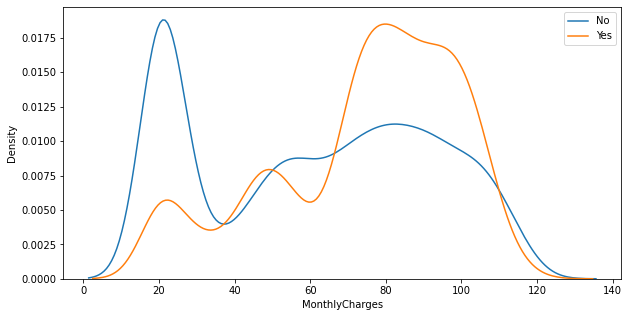

In [24]:
# 每月费用核密度估计图
plt.figure(figsize=(10, 5))    # 构建图像

negDf = data[data['Churn'] == 'No']
sns.distplot(negDf['MonthlyCharges'], hist=False, label= 'No')
posDf = data[data['Churn'] == 'Yes']
sns.distplot(posDf['MonthlyCharges'], hist=False, label= 'Yes')
plt.legend()
plt.show()    # 展示图像

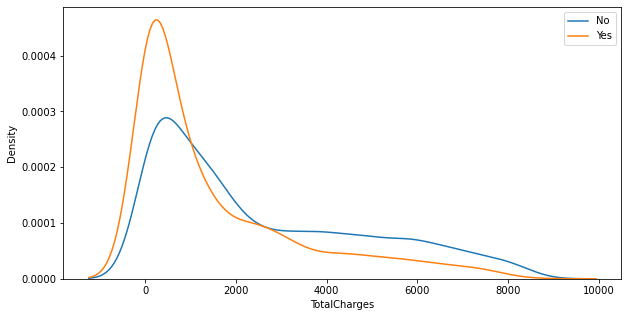

In [25]:
# 总费用核密度估计图
plt.figure(figsize=(10, 5))    # 构建图像

negDf = data[data['Churn'] == 'No']
sns.distplot(negDf['TotalCharges'], hist=False, label= 'No')
posDf = data[data['Churn'] == 'Yes']
sns.distplot(posDf['TotalCharges'], hist=False, label= 'Yes')
plt.legend()
plt.show()    # 展示图像

由图可知：客户的流失率的基本趋势是随每月费用的增加而增长，这与实际业务较为符合；当客户的总费用积累越多，流失率越低，这说明这些客户已经称为稳定的客户，不会轻易流失；此外，当每月费用处于70～110之间时流失率较高。

## 特征工程

- 1、特征提取

- - 连续特征的处理

In [26]:
### 连续数值特征标准化 --  将数值特征缩放到同一尺度下，避免对特征重要性产生误判。【树模型可以不做处理】
from sklearn.preprocessing import StandardScaler    # 导入标准化库

'''
注：
新版本的sklearn库要求输入数据是二维的，而例如data['tenure']这样的Series格式本质上是一维的
如果直接进行标准化，可能报错 "ValueError: Expected 2D array, got 1D array instead"
解决方法是变一维的Series为二维的DataFrame，即多加一组[]，例如data[['tenure']]
'''
scaler = StandardScaler()
data[['tenure']] = scaler.fit_transform(data[['tenure']])
data[['MonthlyCharges']] = scaler.fit_transform(data[['MonthlyCharges']])
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']])

data[['tenure', 'MonthlyCharges', 'TotalCharges']].head()    # 观察此时的数值特征

,tenure,MonthlyCharges,TotalCharges
0,-1.28,-1.16,-0.99
1,0.07,-0.26,-0.17
2,-1.24,-0.36,-0.96
3,0.51,-0.75,-0.19
4,-1.24,0.20,-0.94


In [27]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.32,-1.55,-1.00
25%,-0.95,-0.97,-0.83
50%,-0.14,0.19,-0.39
75%,0.92,0.83,0.66
max,1.61,1.79,2.83


- - 离散特征的处理

In [28]:
### 类别特征编码
# 首先将部分特征值进行合并
data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'

internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'

print("MultipleLines特征还有%d条样本的值为 'No phone service'" % data[data['MultipleLines']=='No phone service'].shape[0])
print("OnlineSecurity特征还有%d条样本的值为 'No internet service'" % data[data['OnlineSecurity']=='No internet service'].shape[0])


MultipleLines特征还有0条样本的值为 'No phone service'
OnlineSecurity特征还有0条样本的值为 'No internet service'


In [29]:
# 部分类别特征只有两类取值，可以直接用0、1代替；另外，可视化过程中发现有四列特征对结果影响可以忽略，后续直接删除
# 选择特征值为‘Yes’和 'No' 的列名
encodeCols = list(data.columns[3: 17].drop(['tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract']))     
for i in encodeCols:
    data[i] = data[i].map({'Yes': 1, 'No': 0})    # 用1代替'Yes’，0代替 'No'
# 顺便把目标变量也进行编码    
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
# 其他无序的类别特征采用独热编码    
onehotCols = ['InternetService', 'Contract', 'PaymentMethod']
churnDf = data['Churn'].to_frame()    # 取出目标变量列，以便后续进行合并
featureDf = data.drop(['Churn'], axis=1)    # 所有特征列

for i in onehotCols:
    onehotDf = pd.get_dummies(featureDf[i],prefix=i) 
    featureDf = pd.concat([featureDf, onehotDf],axis=1)    # 编码后特征拼接到去除目标变量的数据集中

data = pd.concat([featureDf, churnDf],axis=1)    # 拼回目标变量，确保目标变量在最后一列
data = data.drop(onehotCols, axis=1)    # 删除原特征列

In [31]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,Female,0,1,0,-1.28,No,0,0,1,0,0,No,No,1,-1.16,-0.99,1,0,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,Male,0,0,0,0.07,Yes,0,1,0,1,0,No,No,0,-0.26,-0.17,1,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,0,0,-1.24,Yes,0,1,1,0,0,No,No,1,-0.36,-0.96,1,0,0,1,0,0,0,0,0,1,1
3,7795-CFOCW,Male,0,0,0,0.51,No,0,1,0,1,1,No,No,0,-0.75,-0.19,1,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,-1.24,Yes,0,0,0,0,0,No,No,1,0.20,-0.94,0,1,0,1,0,0,0,0,1,0,1


- 2、特征选择


In [32]:
'''
customerID'特征的每个特征值都不同，因此对模型预测不起贡献，可以直接删除。
'gender'、'PhoneService'、'StreamingTV' 和 'StreamingMovies' 则在可视化环节中较为明显地观察到其对目标变量的影响较小，因此也删去这四列特征。
'''
# 删去无用特征 'customerID'、'gender'、 'PhoneService'、'StreamingTV'和'StreamingMovies'
data = data.drop(['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies'], axis=1)
data.head(10)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.28,0,0,1,0,0,1,-1.16,-0.99,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.07,0,1,0,1,0,0,-0.26,-0.17,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,-1.24,0,1,1,0,0,1,-0.36,-0.96,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0.51,0,1,0,1,1,0,-0.75,-0.19,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,-1.24,0,0,0,0,0,1,0.20,-0.94,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-0.99,1,0,0,1,0,1,1.16,-0.64,0,1,0,1,0,0,0,0,1,0,1
6,0,0,1,-0.42,1,0,1,0,0,1,0.81,-0.15,0,1,0,1,0,0,0,1,0,0,0
7,0,0,0,-0.91,0,1,0,0,0,0,-1.16,-0.87,1,0,0,1,0,0,0,0,0,1,0
8,0,1,0,-0.18,1,0,0,1,1,1,1.33,0.34,0,1,0,1,0,0,0,0,1,0,1
9,0,0,1,1.21,0,1,1,0,0,0,-0.29,0.53,1,0,0,0,1,0,1,0,0,0,0


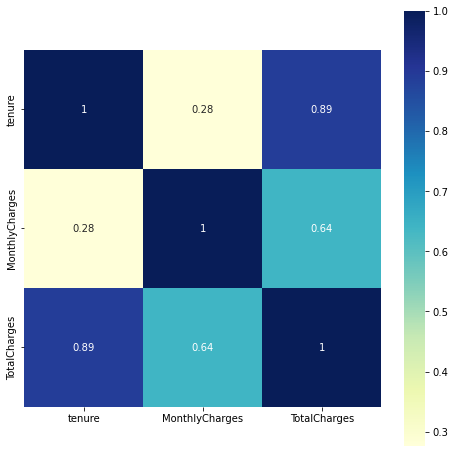

In [33]:
'''
此外，还可以采用相关系数矩阵衡量连续型特征之间的相关性、用卡方检验衡量离散型特征与目标变量的相关关系等等，
从而进行进一步的特征选择。例如，可以对数据集中的三列连续型数值特征 'tenure', 'MonthlyCharges', 'TotalCharges' 计算相关系数，
其中 'TotalCharges' 与其他两列特征的相关系数均大于0.6，即存在较强相关性，因此可以考虑删除该列，以避免特征冗余。
'''
nu_fea = data[['tenure', 'MonthlyCharges', 'TotalCharges']]    # 选择连续型数值特征计算相关系数
nu_fea = list(nu_fea)    # 特征名列表
pearson_mat = data[nu_fea].corr(method='spearman')    # 计算皮尔逊相关系数矩阵

plt.figure(figsize=(8,8)) # 建立图像
sns.heatmap(pearson_mat, square=True, annot=True, cmap="YlGnBu")    # 用热度图表示相关系数矩阵
plt.show() # 展示热度图

In [34]:
data = data.drop(['TotalCharges'], axis=1)
data.head(10)    # 观察此时的数据集

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.28,0,0,1,0,0,1,-1.16,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.07,0,1,0,1,0,0,-0.26,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,-1.24,0,1,1,0,0,1,-0.36,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0.51,0,1,0,1,1,0,-0.75,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,-1.24,0,0,0,0,0,1,0.20,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-0.99,1,0,0,1,0,1,1.16,0,1,0,1,0,0,0,0,1,0,1
6,0,0,1,-0.42,1,0,1,0,0,1,0.81,0,1,0,1,0,0,0,1,0,0,0
7,0,0,0,-0.91,0,1,0,0,0,0,-1.16,1,0,0,1,0,0,0,0,0,1,0
8,0,1,0,-0.18,1,0,0,1,1,1,1.33,0,1,0,1,0,0,0,0,1,0,1
9,0,0,1,1.21,0,1,1,0,0,0,-0.29,1,0,0,0,1,0,1,0,0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   float64
 4   MultipleLines                            7043 non-null   int64  
 5   OnlineSecurity                           7043 non-null   int64  
 6   OnlineBackup                             7043 non-null   int64  
 7   DeviceProtection                         7043 non-null   int64  
 8   TechSupport                              7043 non-null   int64  
 9   PaperlessBilling                         7043 non-null   int64  
 10  MonthlyCharges                           7043 no

In [36]:
data.to_csv("./processed_data/processed_data.csv",index=False)

In [37]:
data.shape

(7043, 22)